In [ ]:
#Joe Takeshi y Augusto Palacios

In [1]:
import pandas as pd
from pycaret.classification import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Cargar la data
df = pd.read_csv("taller2_MLE.csv")

In [3]:
df.head()

,edad,segmento,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,rango_ingresos,region,cerrara_cuenta
0,48,Preferente,43791.80,5,11,0,1,1,4.2,36.82,Medio,Sierra,0
1,36,Estándar,17940.87,1,7,0,1,0,2.2,39.78,Muy Alto,Selva,0
2,48,Estándar,9308.09,4,3,0,1,1,1.0,28.36,Medio,Sierra,1
3,30,Estándar,709.76,5,5,1,1,0,5.0,45.73,Bajo,Selva,0
4,74,Preferente,20471.46,1,4,0,0,1,3.1,39.19,Medio,Sierra,0


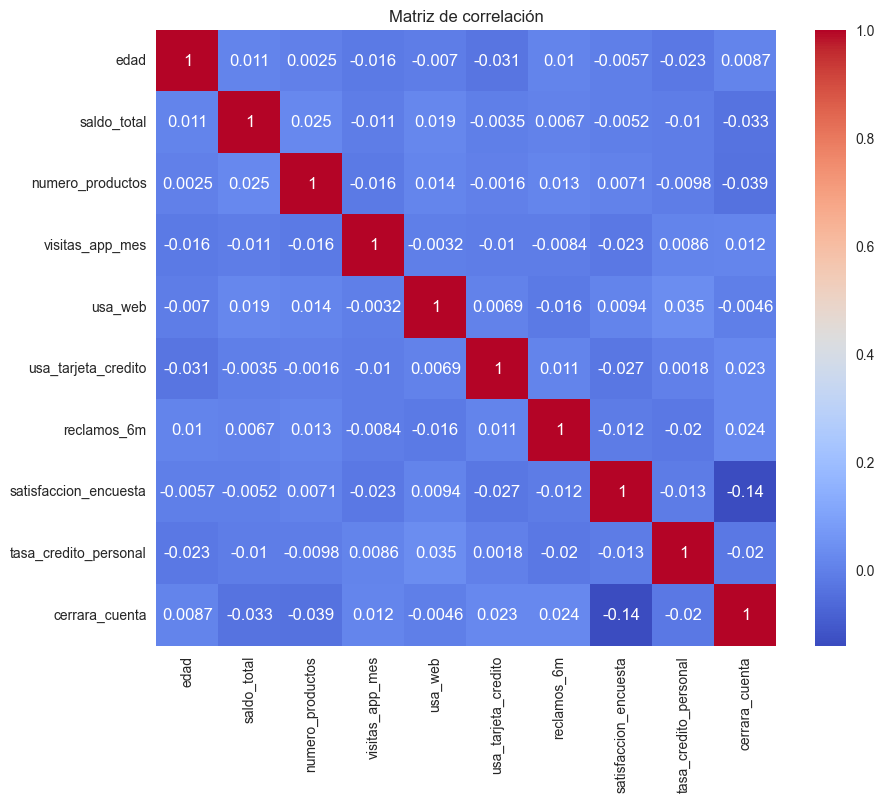

In [36]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

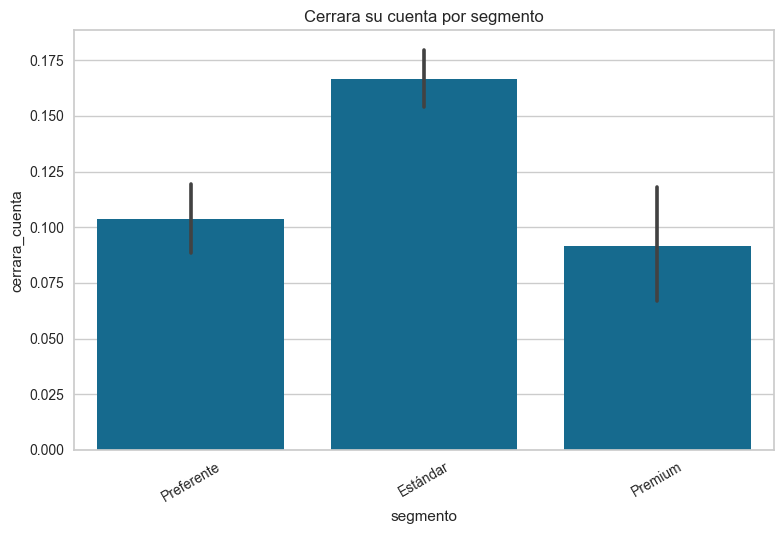

In [4]:
# 2. Análisis exploratorio y posibles sesgos por nivel educativo
sns.barplot(data=df, x='segmento', y='cerrara_cuenta')
plt.title("Cerrara su cuenta por segmento")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

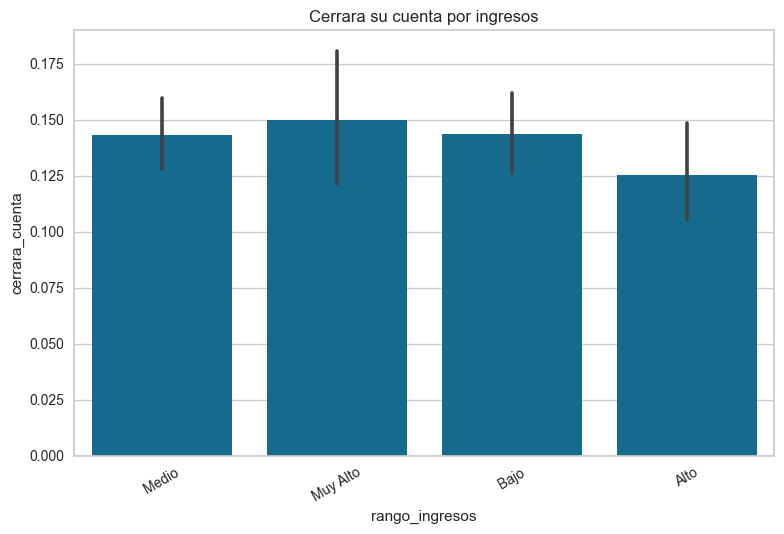

In [10]:
# 2. Análisis exploratorio y posibles sesgos por nivel educativo
sns.barplot(data=df, x='rango_ingresos', y='cerrara_cuenta')
plt.title("Cerrara su cuenta por ingresos")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

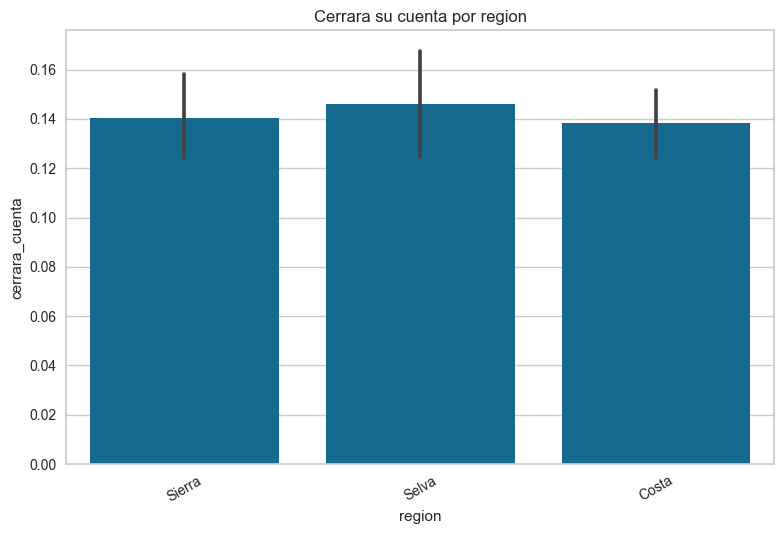

In [9]:
# 2. Análisis exploratorio y posibles sesgos por nivel educativo
sns.barplot(data=df, x='region', y='cerrara_cuenta')
plt.title("Cerrara su cuenta por region")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [12]:
df['cerrara_cuenta'].value_counts(normalize=True)

cerrara_cuenta
0    0.8596
1    0.1404
Name: proportion, dtype: float64

In [26]:
# 4. Configuración PyCaret con enfoque explicativo y ético
clf = setup(data=df,
            target='cerrara_cuenta',
            session_id=2025,
            categorical_features=['segmento', 'rango_ingresos', 'region'],
            transformation=True,
            polynomial_features=True,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.85,
            )

,Description,Value
0,Session id,2025
1,Target,cerrara_cuenta
2,Target type,Binary
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(5000, 133)"
5,Transformed train set shape,"(3500, 133)"
6,Transformed test set shape,"(1500, 133)"
7,Numeric features,9
8,Categorical features,3
9,Preprocess,True


In [28]:
# 5. Comparación por Recall (prioriza detectar malos clientes)
best_model = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5723,0.6010,0.5804,0.1814,0.2763,0.0794,0.1059,0.1460
qda,Quadratic Discriminant Analysis,0.6697,0.5677,0.3523,0.1718,0.2225,0.0498,0.0570,0.1420
dt,Decision Tree Classifier,0.7674,0.5444,0.2343,0.2071,0.2192,0.0835,0.0840,0.1640
knn,K Neighbors Classifier,0.8500,0.5361,0.0469,0.3538,0.0808,0.0438,0.0759,0.1490
svm,SVM - Linear Kernel,0.8443,0.5989,0.0469,0.0694,0.0481,0.0214,0.0237,0.1580
ada,Ada Boost Classifier,0.8540,0.6033,0.0387,0.3264,0.0672,0.0397,0.0674,0.2220
lightgbm,Light Gradient Boosting Machine,0.8497,0.5889,0.0347,0.2247,0.0592,0.0266,0.0392,0.3210
et,Extra Trees Classifier,0.8537,0.6084,0.0285,0.2787,0.0510,0.0267,0.0474,0.2210
lda,Linear Discriminant Analysis,0.8566,0.6029,0.0245,0.3150,0.0450,0.0272,0.0542,0.1560
gbc,Gradient Boosting Classifier,0.8549,0.6103,0.0163,0.2643,0.0303,0.0132,0.0313,0.4750


In [37]:
print(best_model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [38]:
nb= create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5600,0.5672,0.5510,0.1698,0.2596,0.0580,0.0784
1,0.6171,0.6607,0.6531,0.2148,0.3232,0.1426,0.1855
2,0.5657,0.5633,0.5102,0.1634,0.2475,0.0450,0.0594
3,0.6286,0.6486,0.6939,0.2282,0.3434,0.1682,0.2188
4,0.5914,0.6518,0.6327,0.1987,0.3024,0.1136,0.1517
5,0.5343,0.5876,0.5918,0.1686,0.2624,0.0569,0.0810
6,0.5457,0.5730,0.5510,0.1646,0.2535,0.0484,0.0667
7,0.5600,0.5459,0.5306,0.1656,0.2524,0.0496,0.0666
8,0.5657,0.6065,0.5102,0.1634,0.2475,0.0450,0.0594


In [ ]:
# 6. Ajustar y afinar con Recall score
final = tune_model(nb, optimize='Recall')
evaluate_model(final)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5600,0.5672,0.5510,0.1698,0.2596,0.0580,0.0784
1,0.6171,0.6607,0.6531,0.2148,0.3232,0.1426,0.1855
2,0.5657,0.5633,0.5102,0.1634,0.2475,0.0450,0.0594
3,0.6286,0.6486,0.6939,0.2282,0.3434,0.1682,0.2188
4,0.5914,0.6518,0.6327,0.1987,0.3024,0.1136,0.1517
5,0.5343,0.5876,0.5918,0.1686,0.2624,0.0569,0.0810
6,0.5457,0.5730,0.5510,0.1646,0.2535,0.0484,0.0667
7,0.5600,0.5459,0.5306,0.1656,0.2524,0.0496,0.0666
8,0.5657,0.6065,0.5102,0.1634,0.2475,0.0450,0.0594


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [39]:
print(final)

GaussianNB(priors=None, var_smoothing=1e-09)


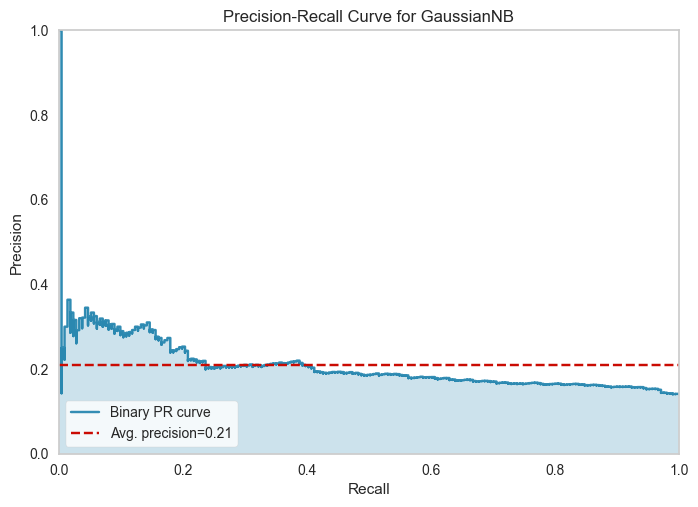

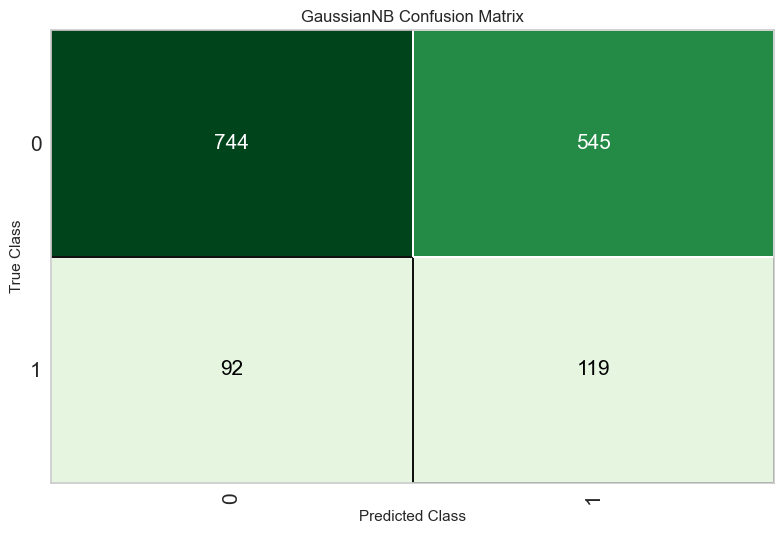

In [40]:
plot_model(final, plot='pr')  # Precision-Recall
plot_model(final, plot='confusion_matrix')

In [44]:
# 7. Crear matriz de decisiones para equipo de talento
preds = predict_model(final)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5753,0.6124,0.5640,0.1792,0.2720,0.0744,0.0988


In [57]:
#Idea para personalizar el umbral:
df_pred = predict_model(final)
df_pred['cerrara_cuenta_final'] = (df_pred['prediction_score']>=0.627).astype(int)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(df_pred['cerrara_cuenta'], df_pred['cerrara_cuenta_final']))
print(classification_report(df_pred['cerrara_cuenta'],df_pred['cerrara_cuenta_final']))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5753,0.6124,0.5640,0.1792,0.2720,0.0744,0.0988


[[ 123 1166]
 [  19  192]]
              precision    recall  f1-score   support

           0       0.87      0.10      0.17      1289
           1       0.14      0.91      0.24       211

    accuracy                           0.21      1500
   macro avg       0.50      0.50      0.21      1500
weighted avg       0.76      0.21      0.18      1500



In [46]:
#Idea para personalizar el umbral:
df_pred = predict_model(final)
df_pred['cerrara_cuenta_final'] = (df_pred['prediction_score']>=0.5).astype(int)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(df_pred['cerrara_cuenta'], df_pred['cerrara_cuenta_final']))
print(classification_report(df_pred['cerrara_cuenta'],df_pred['cerrara_cuenta_final']))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5753,0.6124,0.5640,0.1792,0.2720,0.0744,0.0988


[[   0 1289]
 [   0  211]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1289
           1       0.14      1.00      0.25       211

    accuracy                           0.14      1500
   macro avg       0.07      0.50      0.12      1500
weighted avg       0.02      0.14      0.03      1500



In [61]:
print(df_pred.columns)

Index(['edad', 'segmento', 'saldo_total', 'numero_productos',
       'visitas_app_mes', 'usa_web', 'usa_tarjeta_credito', 'reclamos_6m',
       'satisfaccion_encuesta', 'tasa_credito_personal', 'rango_ingresos',
       'region', 'cerrara_cuenta', 'prediction_label', 'prediction_score',
       'cerrara_cuenta_final'],
      dtype='object')


In [43]:
# 8. Exportar modelo para conectarlo con API externa
save_model(final, 'modelo_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['edad', 'saldo_total',
                                              'numero_productos',
                                              'visitas_app_mes', 'usa_web',
                                              'usa_tarjeta_credito',
                                              'reclamos_6m',
                                              'satisfaccion_encuesta',
                                              'tasa_credito_personal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feature...
                                                               

Preguntas: 
1. ¿Cuál es el porcentaje de clientes que cerraron su cuenta? ¿Está balanceado el dataset? 
Esta desbalanceada, siendo los clientes que cerraron su cuenta de 14.84%
2. ¿Qué variables tienen mayor correlación con cerrara_cuenta? 
1 Satisfación de encuenta, 2 número de producto y 3 saldo_total
3. ¿Cuál es el mejor modelo en AUC? ¿Y en Recall? 
AUC es Logistic Regression y Recall es Naive Bayes
4. ¿Qué combinación de variables permite identificar clientes silenciosos que se van (sin reclamos)? 
Clientes reclamos = 0 y cerrara_cuenta = 1
5. ¿Qué pasa si el modelo predice mal un cliente que no se iba (falso positivo)? ¿Y uno que sí se iba (falso negativo)? 
Falso positivo:
•	Costo: intervención innecesaria (llamada, oferta, incentivo).

•	Impacto: afecta rentabilidad, pero puede reforzar la relación si la acción es bien recibida.

Falso negativo:
•	Costo: pérdida del cliente sin actuar a tiempo.
•	Impacto: pérdida de ingresos y oportunidad de retención.
6. ¿Qué umbral de score (default 0.5 vs optimizado por KS) deberías usar para reducir la pérdida financiera? 
Usar umbral 0.627 (KS) es mejor en la práctica: 
•	Tiene un recall muy alto (91%)
•	Gana cierta precisión al identificar algunos clientes que no se irán.
•	No satura el sistema con falsos positivos como lo hace el umbral 0.5
7. ¿Cómo explicarías con SHAP que un cliente Premium con buen saldo igual fue predicho como fuga? 
8. ¿Debería el modelo incluir la tasa de interés ofrecida como predictor, si luego esta puede cambiar según la política de retención? 
Si la tasa ofrecida depende de la predicción del modelo, esta deja de ser una variable objetiva y comienza a contaminar la predicción, generando un sesgo o fuga de información.
9. ¿Cómo usarías este modelo en un sistema de reglas mixtas (modelo + regla de negocio) para que los gestores humanos no pierdan confianza?
Antes de poner el modelo en producción, aplicaría:
•	Balanceo de clases para mejorar la sensibilidad del modelo.
•	Optimización del umbral con KS para segmentar a los clientes en riesgo bajo, medio y alto.
•	Integración de reglas de negocio visibles, priorizando variables como satisfaccion_encuesta, saldo_total y numero_productos.
Con esto, se implementaría un sistema que combine el score de fuga con explicaciones claras (ej. saldo, uso de canales, reclamos) y recomiende acciones según el nivel de riesgo. Así, el modelo actúa como soporte a la gestión, no como reemplazo.
